#### About : The objective of this task is to predict key point position on Face Image. 
This can be used as a building block in several applications, such as:
* tracking faces in images and video
* analysing facial expressions
* detecting dysmorphic facial signs for medical diagnosis
* biometrics / face recognition 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [3]:
os.listdir('/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data')

['training.csv',
 'IdLookupTable.csv',
 '.DS_Store',
 'SampleSubmission.csv',
 'test.csv']

In [4]:
Train_Dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/training.csv'
Test_Dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/test.csv'
lookid_dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

Data Exploration 

In [5]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Checking for missing value

In [13]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

So there are missing values in 28 columns. We can do two things here one remove the rows having missing values and another is the fill missing values with something. I used two option as removing rows will reduce our dataset. I filled the missing values with the previous values in that row.

In [14]:
train_data.fillna(method = 'ffill',inplace = True)

In [15]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

As there is no missing values we can now separate the labels and features. The image is our feature and other values are labes that we have to predict later. As image column values are in string format and there is also some missing values so we have to split the string by space and append it and also handling missing values

In [16]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

 Lets reshape and convert it into float value.

In [17]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96)
X_train = X_train.reshape(7049,96,96,1)

Lets see what is the first image.

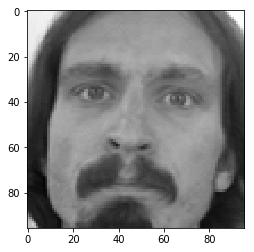

In [18]:
plt.imshow(X_train[0].reshape(96,96,),cmap='gray')
plt.show()

Now lets separate labels.

In [20]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

Lets see whats X and y

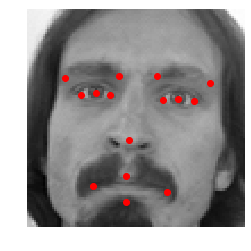

In [23]:
def show(X_train, y_train=None):
    plt.imshow(X_train[..., 0], 'gray')
    if y is not None:
        points = np.vstack(np.split(y_train, 15)).T
        plt.plot(points[0], points[1], 'o', color='red')
        
    plt.axis('off')
    
show(X_train[0], y_train[0])

As our data is ready for training , lets define our model. I am using keras and simple dense layers. For loss function I am using 'mse' ( mean squared error ) as we have to predict new values. Our result evaluted on the basics of 'mae' ( mean absolute error ) .

In [25]:
# Definir correctamente la red neuronal (5 pts)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras import regularizers

model=Sequential([
    Conv2D(72,4,input_shape=(96,96,1),activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01)),
    AvgPool2D(pool_size=(2,2)),
    Conv2D(48,2,activation='relu',use_bias=False,kernel_initializer='he_normal' ,kernel_regularizer=regularizers.l2(0.01)), #Según clase, no se debe inicializar bias antes de un batchnorm
    BatchNormalization(),
    Flatten(),
    Dropout(0.5), #Actúa como regularizador
    Dense(48,activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)), #Importante utilizar he initialization para relu
#     Dropout(0.2), #Actúa como regularizador
#     Dense(40,activation='relu', kernel_initializer='he_normal'), #Importante utilizar he initialization para relu
    Dense(30, kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01)) # No hay activación acá por ser un problema de regresión
])

model.compile(optimizer=Adam(0.01),loss='mse',metrics=['mae']) # Settings según indicaciones

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
# Model Summary
model.summary(), model.input, model.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 93, 93, 72)        1224      
_________________________________________________________________
average_pooling2d_1 (Average (None, 46, 46, 72)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 48)        13824     
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 48)        192       
_________________________________________________________________
flatten_1 (Flatten)          (None, 97200)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 48)                4665648   
__________

(None,
 <tf.Tensor 'conv2d_1_input:0' shape=(?, 96, 96, 1) dtype=float32>,
 <tf.Tensor 'dense_2/BiasAdd:0' shape=(?, 30) dtype=float32>)

Now our model is defined and we will train it by calling fit method. I ran it for 500 iteration keeping batch size and validtion set size as 20% ( 20% of the training data will be kept for validating the model 

In [28]:
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam

hist = History()
epochs = 11
batch_size = 64


## TODO: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist_final = model.fit(X_train, y_train, validation_split=0.2,epochs=epochs, batch_size=batch_size, callbacks=[hist], verbose=1)
 
    

Train on 5639 samples, validate on 1410 samples
Epoch 1/11
5639/5639 [==============================] - 109s 19ms/step - loss: 357.7553 - acc: 0.3114 - val_loss: 633.3833 - val_acc: 0.2553
Epoch 2/11
5639/5639 [==============================] - 112s 20ms/step - loss: 33.9798 - acc: 0.5313 - val_loss: 324.5796 - val_acc: 0.3411
Epoch 3/11
5639/5639 [==============================] - 108s 19ms/step - loss: 26.6337 - acc: 0.5673 - val_loss: 59.2073 - val_acc: 0.5078
Epoch 4/11
5639/5639 [==============================] - 101s 18ms/step - loss: 24.9296 - acc: 0.5687 - val_loss: 26.7589 - val_acc: 0.3170
Epoch 5/11
5639/5639 [==============================] - 110s 19ms/step - loss: 23.1120 - acc: 0.5721 - val_loss: 27.8654 - val_acc: 0.4887
Epoch 6/11
5639/5639 [==============================] - 104s 18ms/step - loss: 22.6186 - acc: 0.5705 - val_loss: 22.7562 - val_acc: 0.6085
Epoch 7/11
5639/5639 [==============================] - 95s 17ms/step - loss: 21.3522 - acc: 0.5818 - val_loss: 66.

Now lets prepare our testing data

In [54]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

Reshaping and converting

In [55]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

Lets see first image in out test data

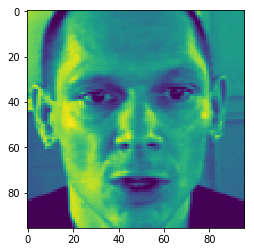

In [72]:
plt.imshow(X_test[2])
plt.show()

In [62]:
pred = model.predict(X_test.reshape(1783,96,96,1))

Now the last step is the create our submission file keeping in the mind required format. There should be two columns :- RowId and Location Location column values should be filled according the lookup table provided ( IdLookupTable.csv)

In [63]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [64]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [65]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [66]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [67]:
rowid = pd.Series(rowid,name = 'RowId')

In [68]:
loc = pd.Series(preded,name = 'Location')

In [69]:
submission = pd.concat([rowid,loc],axis = 1)
submission.head()

,RowId,Location
0,1,63.101902
1,2,36.372475
2,3,28.358076
3,4,33.355247
4,5,56.946941


In [70]:
submission.to_csv('face_key_detection_submission.csv',index = False)

Reference : https://www.kaggle.com/dimitrkovalsky/rnn-model